Импортируем библиотеки, загружаем данные:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_pickle('archive (1)/train.pickle')
train_features, test_features, train_labels, test_labels = train_test_split(
train_data['features'], train_data['labels'], train_size = 0.8, random_state=42)
train_features_dim2 = train_features.reshape(len(train_features), 32*32*3)
test_features_dim2 = test_features.reshape(len(test_features), 32*32*3)

1.(Easy)

Для начала посмотрим, сколько картинок содержится в каждом классе:

In [3]:
count = np.unique(train_labels, return_counts=True)[1]
print(count, '\n')
print(min(count), max(count))

[ 142 1555 1616 1018 1397 1312  304 1048 1023 1067 1468  941 1473 1534
  560  415  283  787  861  154  243  209  265  373  198 1089  430  158
  382  200  301  551  174  491  286  840  263  143 1490  217  230  182
  166] 

142 1616


Как видно, изначально присутствовал дисбаланс классов, поэтому в качестве метрики берем f1_score(для сравнения буду выводить еще accuracy_score)

In [4]:
model = LogisticRegression(max_iter = 200)
model.fit(train_features_dim2, train_labels)
test_predict = model.predict(test_features_dim2)
f1 = f1_score(test_labels, test_predict, average='macro')
print('f1: ', f1)
acc = accuracy_score(test_labels, test_predict)
print('accuracy: ', acc)

f1:  0.9463070066499503
accuracy:  0.9488505747126437


/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Немного потыкавшись, заметил, что при max_iter > 230 и max_iter < 150 accuracy_score и f1_score ниже, чем при max_iter = 200. Теперь взглянем на confusion_matrix:

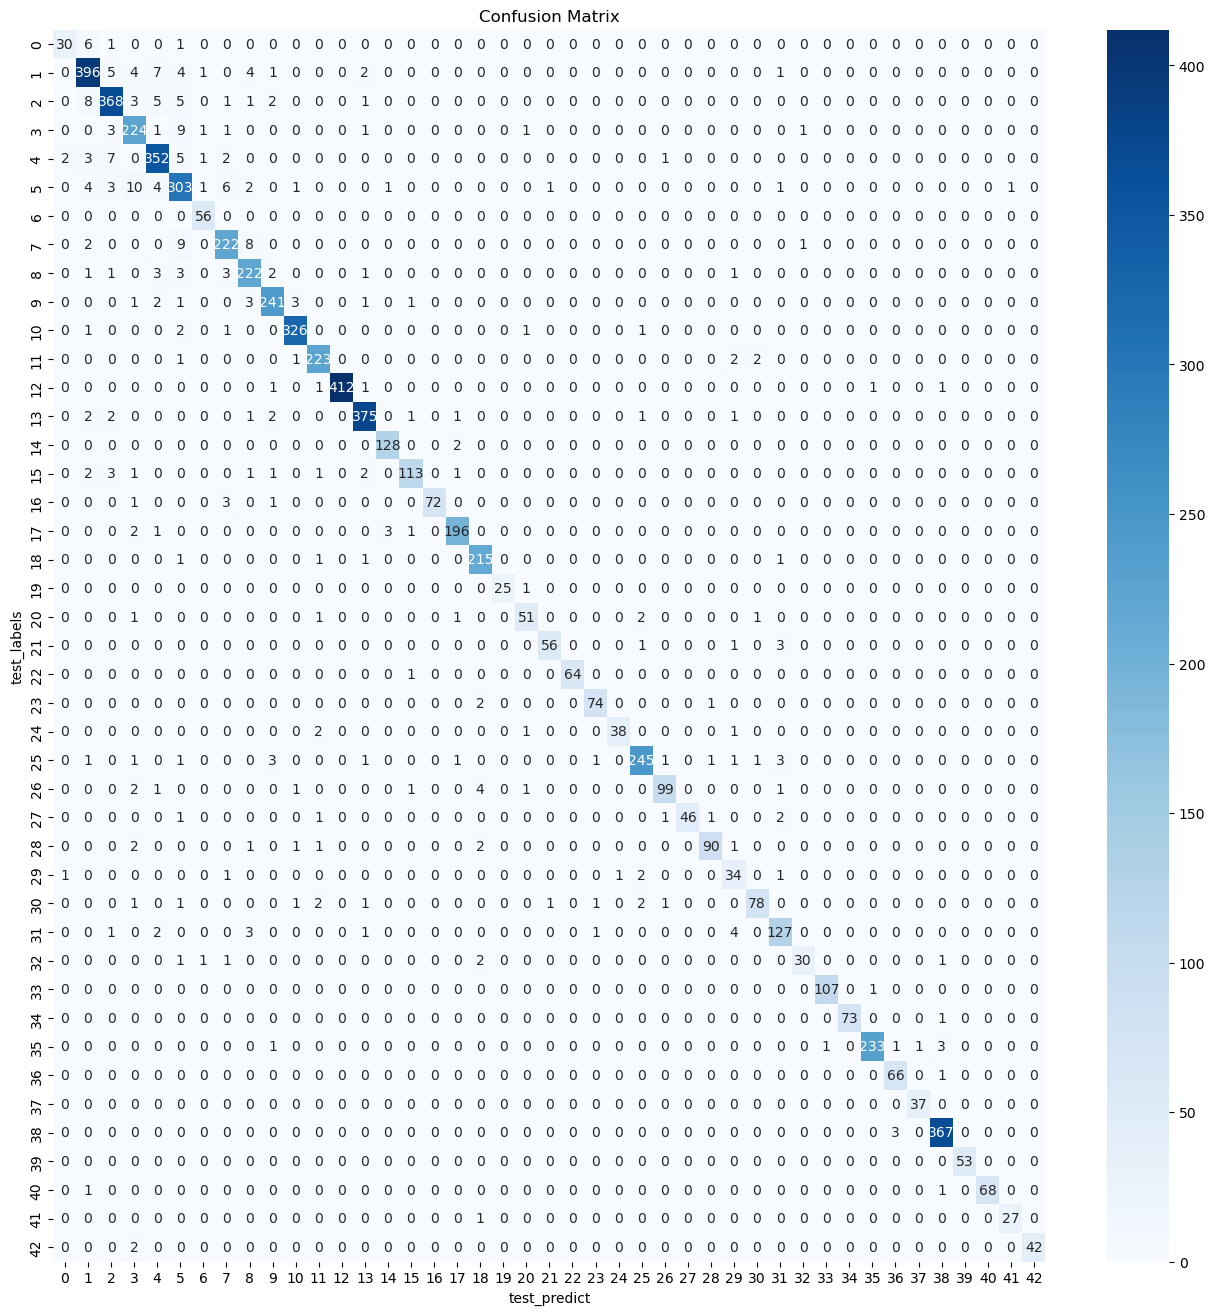

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_labels, test_predict)
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("test_predict")
plt.ylabel("test_labels")
plt.title("Confusion Matrix")
plt.show()

Наибольшая confusion у того индекса знака, у которого максимальная сумма в строке, без учета ячеек на диагонали. Найдем его:

In [6]:
values = []
for i in range(43):
    sum_i = 0
    for j in range(43):
        if (i != j):
            sum_i += cm[i][j]
    values.append(sum_i)
most_conf_id = values.index(max(values))
df = pd.read_csv('archive (1)/label_names.csv')
print(df.iloc[most_conf_id])

ClassId                        5
SignName    Speed limit (80km/h)
Name: 5, dtype: object


2.(Medium)

Обучим kNN (Выбран параметр n_neighbors = 5):

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(train_features_dim2, train_labels)
knn_test_predict = knn_model.predict(test_features_dim2)
f1 = f1_score(test_labels, knn_test_predict, average='macro')
print('f1: ', f1)
knn_acc = accuracy_score(test_labels, knn_test_predict)
print('accuracy: ', knn_acc)

f1:  0.8770581814893529
accuracy:  0.8721264367816092


Обучим НБК (берем MultinomialNB, хотя теоретически, если данные распределены нормально, можно было бы взять GaussianNB):

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbk_model = MultinomialNB()
nbk_model.fit(train_features_dim2, train_labels)
nbk_test_predict = nbk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, nbk_test_predict, average='macro')
print('f1: ', f1)
nbk_acc = accuracy_score(test_labels, nbk_test_predict)
print('accuracy: ', nbk_acc)

f1:  0.3305439944550318
accuracy:  0.3275862068965517


Обучим SVM.

Линейное ядро:

In [9]:
from sklearn.svm import SVC
lk_model = SVC(kernel = 'linear')
lk_model.fit(train_features_dim2, train_labels)
lk_test_predict = lk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, lk_test_predict, average='macro')
print('f1: ', f1)
lk_acc = accuracy_score(test_labels, lk_test_predict)
print('accuracy: ', lk_acc)

f1:  0.9527962674469023
accuracy:  0.957183908045977


Полиномиальное ядро:

In [10]:
pk_model = SVC(kernel = 'poly')
pk_model.fit(train_features_dim2, train_labels)
pk_test_predict = pk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, pk_test_predict, average='macro')
print('f1: ', f1)
pk_acc = accuracy_score(test_labels, pk_test_predict)
print('accuracy: ', pk_acc)

f1:  0.7419870736408514
accuracy:  0.7156609195402299


Радиальное базисное ядро:

In [12]:
rbk_model = SVC(kernel = 'rbf')
rbk_model.fit(train_features_dim2, train_labels)
rbk_test_predict = rbk_model.predict(test_features_dim2)
f1 = f1_score(test_labels, rbk_test_predict, average='macro')
print('f1: ', f1)
rbk_acc = accuracy_score(test_labels, rbk_test_predict)
print('accuracy: ', rbk_acc)

f1:  0.8772402998900357
accuracy:  0.8807471264367817


Лучший результат показывает логистическая регрессия, далее - SVC на линейном ядре. Хуже всех оказался НБК, скорее всего, из-за предположения о независимости классов.

3.(Hard) #TODO

Суть задачи состоит в том, чтобы взять какое-нибудь оптимальное количество снимков (заплатив за них не сильно много денег), и каждый снимок размножить с помощью поворотов/изменения цвета(получив с помощью таких операций примерно такое же количество картинок, как в исходном), затем - обучить полученный датасет, получив при этом хороший показатель на метрике.
Я буду брать равное количество картинок для каждого класса, чтобы не было дисбаланса классов и не приходилось применять регуляризацию.

Далее у меня где-то ошибка при применении функции transformation_brightness_rotation(img), а выбрать поровну картинок из классов - получилось. Короче, надо бы доделать

In [31]:
from datasets_preparing import *


def select_balanced_df(features, labels, count=5, aug_num=50):
    res_df = pd.DataFrame(columns = [f"ft_{i}" for i in range(len(features[0]))] + ['labels'])

    df = pd.DataFrame(features, columns = [f"ft_{i}" for i in range(len(features[0]))])
    df['labels'] = labels
    
    for cls in pd.unique(labels):
        mask = (labels==cls)
        for row in df[mask].sample(count).values:
            print(row)
            img = row[:-1].reshape(32, 32, 3)
            for i in range(aug_num):
                new_img = transformation_brightness_rotation(img).reshape(-1)
                new_row = pd.Series(new_img)
                
                res_df = pd.concat((res_df, new_row), axis=0)
    return res_df[[x for x in res_df if x != 'labels']].astype(int), res_df[['labels']].astype(int)

X_train, y_train = select_balanced_df(train_features_dim2, train_labels)

[22 23 22 ... 23 21  2]
[162 159 137 ... 112  77   2]
[46 54 50 ... 43 40  2]
[255 255 255 ...  32  25   2]
[ 22  22  17 ... 115  62   2]
[41 37 37 ... 64 35 17]
[147 101  94 ...  42  29  17]
[61 60 88 ... 50 58 17]
[61 55 58 ... 30 25 17]
[68 68 69 ... 78 58 17]
[253 255 255 ... 255 252  30]
[192 219 255 ... 132 147  30]
[19 18 17 ... 16 17 30]
[23 22 22 ... 22 24 30]
[133 213 248 ...  53  58  30]
[163 176 183 ...  43  42  18]
[255 255 255 ... 255 255  18]
[34 25 25 ... 26 25 18]
[255 255 255 ... 255 255  18]
[57 54 44 ... 61 58 18]
[93 92 93 ... 82 79  5]
[119 142 174 ... 122 151   5]
[61 68 91 ... 29 41  5]
[19 21 25 ... 17 22  5]
[137 154 188 ...  16  21   5]
[24 26 24 ... 32 29 14]
[255 255 255 ...  32  28  14]
[28 29 28 ... 45 43 14]
[72 60 57 ... 43 37 14]
[208 215 206 ...  24  23  14]
[41 47 48 ... 42 49 29]
[255 255 255 ... 130 130  29]
[248 254 253 ... 255 255  29]
[29 31 35 ... 28 32 29]
[47 42 38 ... 23 22 29]
[237 208 167 ...  52  47  32]
[106 118 118 ...  46  38  32]
[ 95

In [ ]:
from datasets_preparing import *

def select_balanced_df(features, labels, count=5, aug_num=50):
    res_df = pd.DataFrame(columns = [f"ft_{i}" for i in range(len(features[0]))] + ['labels'])

    df = pd.DataFrame(features, columns = [f"ft_{i}" for i in range(len(features[0]))])
    df['labels'] = labels
    
    for cls in pd.unique(labels):
        mask = (labels==cls)
        for row in df[mask].sample(count).values:
            img = row[:-1].reshape(32, 32, 3)
            for i in range(aug_num):
                new_img = transformation_brightness_rotation(img).reshape(-1)
                new_row = row.copy()
                new_row[new_row.columns[:1]] = new_img
                res_df = pd.concat((res_df, new_row), axis=0)
    return res_df[[x for x in res_df if x != 'labels']].astype(int), res_df[['labels']].astype(int)

X_train, y_train = select_balanced_df(train_features_dim2, train_labels)

In [41]:
X_train

,ft_0,ft_1,ft_2,ft_3,ft_4,ft_5,ft_6,ft_7,ft_8,ft_9,...,ft_3062,ft_3063,ft_3064,ft_3065,ft_3066,ft_3067,ft_3068,ft_3069,ft_3070,ft_3071
5487,229,185,72,251,185,77,239,153,44,217,...,53,234,156,83,254,185,111,255,175,101
21587,123,138,79,121,127,76,126,123,75,116,...,50,59,56,54,60,55,51,50,46,39
26189,56,58,40,47,49,30,59,62,41,64,...,44,81,75,41,76,60,32,75,62,40
19367,27,28,30,36,38,42,41,42,45,44,...,87,110,101,92,104,95,85,102,98,83
15149,178,120,60,170,118,61,197,122,69,238,...,40,91,67,44,106,89,70,131,109,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12218,36,35,37,36,35,38,36,36,39,36,...,60,30,38,60,30,39,61,31,39,61
20810,196,238,254,190,229,252,196,240,255,194,...,243,163,198,248,160,190,234,152,180,219
14235,152,177,223,150,174,221,149,171,218,147,...,70,59,62,68,57,60,66,56,58,64
19487,254,249,237,254,243,230,225,212,201,216,...,151,163,158,149,161,157,146,163,158,146


In [42]:
y_train['labels']

5487      2
21587     2
26189     2
19367     2
15149     2
         ..
12218    40
20810    40
14235    40
19487    40
24044    40
Name: labels, Length: 3440, dtype: int64

In [43]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)
test_predict = model.predict(test_features_dim2)
f1 = f1_score(test_labels, test_predict, average='macro')
print('f1: ', f1)
acc = accuracy_score(test_labels, test_predict)
print('accuracy: ', acc)

/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/banana_cat/anaconda3/envs/my-environment/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Logist

f1:  0.8344096195072876
accuracy:  0.8274425287356322
